# Table of Contents
 <p><div class="lev1 toc-item"><a href="#Gluino-pair-production-with-decays-to-1st-generation-fermions" data-toc-modified-id="Gluino-pair-production-with-decays-to-1st-generation-fermions-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Gluino pair production with decays to 1st generation fermions</a></div><div class="lev2 toc-item"><a href="#First-load-the-required-packages" data-toc-modified-id="First-load-the-required-packages-11"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>First load the required packages</a></div><div class="lev2 toc-item"><a href="#Load-the-initial-datasets" data-toc-modified-id="Load-the-initial-datasets-12"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Load the initial datasets</a></div><div class="lev2 toc-item"><a href="#Initial-network-training" data-toc-modified-id="Initial-network-training-13"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Initial network training</a></div><div class="lev3 toc-item"><a href="#Fully-supervised-network" data-toc-modified-id="Fully-supervised-network-131"><span class="toc-item-num">1.3.1&nbsp;&nbsp;</span>Fully supervised network</a></div><div class="lev3 toc-item"><a href="#Weakly-supervised-network" data-toc-modified-id="Weakly-supervised-network-132"><span class="toc-item-num">1.3.2&nbsp;&nbsp;</span>Weakly supervised network</a></div><div class="lev4 toc-item"><a href="#Data-preparation" data-toc-modified-id="Data-preparation-1321"><span class="toc-item-num">1.3.2.1&nbsp;&nbsp;</span>Data preparation</a></div><div class="lev4 toc-item"><a href="#The-actual-network-definition" data-toc-modified-id="The-actual-network-definition-1322"><span class="toc-item-num">1.3.2.2&nbsp;&nbsp;</span>The actual network definition</a></div><div class="lev2 toc-item"><a href="#Initial-testing-of-the-networks" data-toc-modified-id="Initial-testing-of-the-networks-14"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Initial testing of the networks</a></div><div class="lev3 toc-item"><a href="#Define-the-predictions" data-toc-modified-id="Define-the-predictions-141"><span class="toc-item-num">1.4.1&nbsp;&nbsp;</span>Define the predictions</a></div><div class="lev2 toc-item"><a href="#Load-the-weighted-events" data-toc-modified-id="Load-the-weighted-events-15"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Load the weighted events</a></div><div class="lev2 toc-item"><a href="#Pseudo-mis-modeling" data-toc-modified-id="Pseudo-mis-modeling-16"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>Pseudo mis-modeling</a></div><div class="lev3 toc-item"><a href="#Train-the-networks:-Fully-supervised" data-toc-modified-id="Train-the-networks:-Fully-supervised-161"><span class="toc-item-num">1.6.1&nbsp;&nbsp;</span>Train the networks: Fully supervised</a></div><div class="lev3 toc-item"><a href="#Weakly-supervised" data-toc-modified-id="Weakly-supervised-162"><span class="toc-item-num">1.6.2&nbsp;&nbsp;</span>Weakly supervised</a></div><div class="lev3 toc-item"><a href="#Now-plot-the-results-of-the-training" data-toc-modified-id="Now-plot-the-results-of-the-training-163"><span class="toc-item-num">1.6.3&nbsp;&nbsp;</span>Now plot the results of the training</a></div><div class="lev2 toc-item"><a href="#Check-the-models-against-different-signals-(gluino-pair-production-with-decays-to-1st-generation-OR-stop-pair-production)" data-toc-modified-id="Check-the-models-against-different-signals-(gluino-pair-production-with-decays-to-1st-generation-OR-stop-pair-production)-17"><span class="toc-item-num">1.7&nbsp;&nbsp;</span>Check the models against different signals (gluino pair production with decays to 1st generation OR stop pair production)</a></div><div class="lev2 toc-item"><a href="#Using-both-neural-network-outputs-together" data-toc-modified-id="Using-both-neural-network-outputs-together-18"><span class="toc-item-num">1.8&nbsp;&nbsp;</span>Using both neural network outputs together</a></div>

# Gluino pair production with decays to 1st generation fermions
This notebook examines the differences between fully supervised and weakly supervised artifical neural networks in separating gluino pair production from the dominant SM background. As we find the weakly supervised networks work better than expected, and are failry robust, we also test a how the networks behave when they are given unexpected events. This will include a test on mis-modelled data and gluino pair production when the decays are predominantely to 1st generation fermions. Lastly, we will show that the combination of weak supervision with full supervision can yield even better results.

## First load the required packages

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import matplotlib.colors as colors

In [2]:
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import SGD, Adam
from keras.callbacks import ModelCheckpoint, EarlyStopping
import keras.callbacks

plt.rcParams.update({'font.family':'cmr10','font.size': 13})
plt.rcParams['axes.unicode_minus']=False
plt.rcParams['axes.labelsize']=15

Using TensorFlow backend.


Couldn't import dot_parser, loading of dot files will not be possible.


## Load the initial datasets

In [3]:
ZJet = pd.read_csv('../Data/Z_Jets_data.txt',dtype=float)
x_cols = list(ZJet.columns)
x_cols.remove('weight')
ZJet['Y']=0
ZJet['XS']=28.83
print ZJet.head()
print len(ZJet)

          MET      PT(J1)     PT(J2)     PT(J3)  PT(J4)  PT(J5)  PT(J6)  \
0  253.087784  250.320816   0.000000   0.000000     0.0     0.0     0.0   
1  261.409821  229.624542  45.158997   0.000000     0.0     0.0     0.0   
2  232.673737  277.371552  68.850410   0.000000     0.0     0.0     0.0   
3  217.952271  221.364166   0.000000   0.000000     0.0     0.0     0.0   
4  271.402985  247.162766  97.523376  45.099197     0.0     0.0     0.0   

   PT(J7)  PT(J8)  PT(J9)  PT(J10)    weight  Y     XS  
0     0.0     0.0     0.0      0.0  0.000057  0  28.83  
1     0.0     0.0     0.0      0.0  0.000057  0  28.83  
2     0.0     0.0     0.0      0.0  0.000057  0  28.83  
3     0.0     0.0     0.0      0.0  0.000057  0  28.83  
4     0.0     0.0     0.0      0.0  0.000057  0  28.83  
264303


In [4]:
Gluinos_1stGen = pd.read_csv('../Data/Gluino_1stGen.txt',dtype=float)
Gluinos_1stGen.head()

,MET,PT(J1),PT(J2),PT(J3),PT(J4),PT(J5),PT(J6),PT(J7),PT(J8),PT(J9),PT(J10),weight
0,1035.262695,1025.169189,957.710632,605.566101,195.419067,106.979652,58.156300,0.000000,0.000000,0.0,0.0,6.370780e-10
1,741.380493,1317.837036,677.725220,223.478897,208.367645,121.742661,54.644085,0.000000,0.000000,0.0,0.0,6.370780e-10
2,1091.600464,925.912964,726.345032,716.401917,182.365189,0.000000,0.000000,0.000000,0.000000,0.0,0.0,6.370780e-10
3,919.562744,541.299500,498.659943,455.610474,418.091644,206.259903,167.933517,66.530518,42.658268,0.0,0.0,6.370780e-10
4,761.842529,1153.671021,1060.496582,818.396973,110.987244,54.105381,0.000000,0.000000,0.000000,0.0,0.0,6.370780e-10


Build a test set, which is made up of 10% of each of the samples. This will always be what we test against. The rest of the data will be used for a fully supervised network and a weakly supervised.

In [5]:
test_gluinos_1st = int(len(Gluinos_1stGen)*0.1)
test_z = int(len(ZJet)*0.1)

test_x_raw_1st = Gluinos_1stGen[:test_gluinos_1st][x_cols]
test_y_1st = np.ones(test_gluinos_1st)
test_x_raw_1st = np.vstack([test_x_raw_1st, ZJet[:test_z][x_cols]])
test_y_1st = np.append(test_y_1st,np.zeros(test_z))

print "X shape:", test_x_raw_1st.shape
print "Y shape:", test_y_1st.shape

X shape: (73765, 11)
Y shape: (73765,)


In [6]:
train_x_raw_1st = Gluinos_1stGen[test_gluinos_1st:][x_cols]
train_y_1st = np.ones(len(Gluinos_1stGen)-test_gluinos_1st)

train_x_raw_1st = np.vstack([train_x_raw_1st, ZJet[test_z:][x_cols]])
train_y_1st = np.append(train_y_1st,np.zeros(len(ZJet)-test_z))

print "X shape:", train_x_raw_1st.shape
print "Y shape:", train_y_1st.shape

X shape: (663897, 11)
Y shape: (663897,)


Now split the 'training' data up into a real training and validation set.

In [7]:
x_train_1st_raw, x_valid_1st_raw, Y_TRAIN_1st, Y_VALID_1st =  train_test_split(train_x_raw_1st,
                                                                       train_y_1st,
                                                                       test_size=0.2,
                                                                       random_state=42)

Scale the data so that it has a mean of 0 and unit standard deviation.

In [8]:
scaler1st = StandardScaler()

x_train_1st = scaler1st.fit_transform(x_train_1st_raw)
x_valid_1st = scaler1st.transform(x_valid_1st_raw)
x_test_1st = scaler1st.transform(test_x_raw_1st)

## Initial network training
### Fully supervised network

In [9]:
FullySupervisedModel= Sequential()
FullySupervisedModel.add(Dense(30, activation="sigmoid", kernel_initializer="normal", input_dim=11))
FullySupervisedModel.add(Dense(1, activation="sigmoid", kernel_initializer="normal"))
FullySupervisedModel.compile(loss='binary_crossentropy',optimizer=SGD(lr=0.01))

In [10]:
# On the first run, uncomment the next two lines. This will train the model and save the results
# FullySupervisedModel.fit(x_train_1st,Y_TRAIN_1st,validation_data=(x_valid_1st,Y_VALID_1st))
# FullySupervisedModel.save('../Data/KerasModelWeights/FullySupervisedGluinos_1stgen.h5')
FullySupervisedModel.load_weights('../Data/KerasModelWeights/FullySupervisedGluinos_1stgen.h5')

### Weakly supervised network
First define the cost function

In [11]:
# for custom metrics
import keras.backend as K
def WeakSupervision(y_true, y_pred):
    return K.abs((K.mean(y_pred, axis=-1) - K.mean(y_true,axis=-1)))

#### Data preparation
Set the labels (ratios) for two different datasets. Use a 80% of the background and 40% of the signal for one set and the remaining 20% and 60% for the second dataset

In [12]:
length_0_1st = x_train_1st[Y_TRAIN_1st==0].shape[0]
length_1_1st = x_train_1st[Y_TRAIN_1st==1].shape[0]
print length_0_1st, length_1_1st

190314 340803


In [13]:
# Set A: 80% of total background and 40% of total signal
set_a_0_1st = x_train_1st[Y_TRAIN_1st==0][:int(0.8*length_0_1st)]
set_a_1_1st = x_train_1st[Y_TRAIN_1st==1][:int(0.4*length_1_1st)]
percentage_a_1st = (0.4*length_1_1st)/(0.4*length_1_1st+0.8*length_0_1st)
print "Percentage of signal for set A:", percentage_a_1st
set_a_1st = np.vstack([set_a_0_1st,set_a_1_1st])
set_a_percentages_1st = np.ones(set_a_1st.shape[0])*percentage_a_1st
set_a_truth_1st = np.append(np.zeros(int(0.8*length_0_1st)),np.ones(int(0.4*length_1_1st)))
print len(set_a_truth_1st),len(set_a_1st),len(set_a_percentages_1st)

Percentage of signal for set A: 0.472398607767
288572 288572 288572


In [14]:
true_a1 = np.sum(Y_TRAIN_1st[Y_TRAIN_1st==0][:int(0.8*length_0_1st)]==1) +  np.sum(Y_TRAIN_1st[Y_TRAIN_1st==1][:int(0.4*length_1_1st)]==1)
true_a0 = np.sum(Y_TRAIN_1st[Y_TRAIN_1st==0][:int(0.8*length_0_1st)]==0) +  np.sum(Y_TRAIN_1st[Y_TRAIN_1st==1][:int(0.4*length_1_1st)]==0)

true_a_percent = float(true_a1)/(true_a1 + true_a0)
print true_a_percent

0.472398569508


In [15]:
# Set B: last 20% of total background and last 60% of total signal
set_b_0_1st = x_train_1st[Y_TRAIN_1st==0][int(0.8*length_0_1st):]
set_b_1_1st = x_train_1st[Y_TRAIN_1st==1][int(0.4*length_1_1st):]
percentage_b_1st = (0.6*length_1_1st)/(0.6*length_1_1st+0.2*length_0_1st)
print "Percentage of signal for set B:", percentage_b_1st
set_b_1st = np.vstack([set_b_0_1st,set_b_1_1st])
set_b_percentages_1st = np.ones(set_b_1st.shape[0])*percentage_b_1st
set_b_truth_1st = np.append(np.zeros(length_0_1st-int(0.8*length_0_1st)),np.ones(length_1_1st-int(0.4*length_1_1st)))
print len(set_b_truth_1st),len(set_b_1st),len(set_b_percentages_1st)

Percentage of signal for set B: 0.843068862387
242545 242545 242545


In [16]:
# Now split up the validation data in the same way

length_0_1stv = x_valid_1st[Y_VALID_1st==0].shape[0]
length_1_1stv = x_valid_1st[Y_VALID_1st==1].shape[0]

# Set A: 80% of total validation background and 40% of total signal
set_a_0_1stv = x_valid_1st[Y_VALID_1st==0][:int(0.8*length_0_1stv)]
set_a_1_1stv = x_valid_1st[Y_VALID_1st==1][:int(0.4*length_1_1stv)]
percentage_a_1stv = (0.4*length_1_1stv)/(0.4*length_1_1stv+0.8*length_0_1stv)
print "Percentage of signal for set A validation:", percentage_a_1stv
set_a_1stv = np.vstack([set_a_0_1stv,set_a_1_1stv])
set_a_percentages_1stv = np.ones(set_a_1stv.shape[0])*percentage_a_1stv
set_a_truth_1stv = np.append(np.zeros(int(0.8*length_0_1stv)),np.ones(int(0.4*length_1_1stv)))
print len(set_a_truth_1stv),len(set_a_1stv),len(set_a_percentages_1stv)

# Set B: last 20% of total background and last 60% of total signal
set_b_0_1stv = x_valid_1st[Y_VALID_1st==0][int(0.8*length_0_1stv):]
set_b_1_1stv = x_valid_1st[Y_VALID_1st==1][int(0.4*length_1_1stv):]
percentage_b_1stv = (0.6*length_1_1stv)/(0.6*length_1_1stv+0.2*length_0_1stv)
print "Percentage of signal for set B:", percentage_b_1stv
set_b_1stv = np.vstack([set_b_0_1stv,set_b_1_1stv])
set_b_percentages_1stv = np.ones(set_b_1stv.shape[0])*percentage_b_1stv
set_b_truth_1stv = np.append(np.zeros(length_0_1stv-int(0.8*length_0_1stv)),np.ones(length_1_1stv-int(0.4*length_1_1stv)))
print len(set_b_truth_1stv),len(set_b_1stv),len(set_b_percentages_1stv)

Percentage of signal for set A validation: 0.472560011977
72135 72135 72135
Percentage of signal for set B: 0.84315452045
60645 60645 60645


In [17]:
# combine sets A and B to make one training and validation set
X_Train_1st = np.vstack([set_a_1st,set_b_1st])
X_Valid_1st = np.vstack([set_a_1stv,set_b_1stv])

Y_Train_1st = np.append(set_a_percentages_1st,set_b_percentages_1st)
Y_Valid_1st = np.append(set_a_percentages_1stv,set_b_percentages_1stv)

#### The actual network definition

In [18]:
WeaklySupervisedModel= Sequential()
WeaklySupervisedModel.add(Dense(30, activation="sigmoid", kernel_initializer="normal", input_dim=11))
WeaklySupervisedModel.add(Dense(1, activation="sigmoid", kernel_initializer="normal"))
WeaklySupervisedModel.compile(loss=WeakSupervision,optimizer=Adam(lr=0.00001))

In [19]:
# On the first run, uncomment the next lines. This will train the model and save the results
# WeaklySupervisedModel.fit(X_Train_1st, 
#                           Y_Train_1st, 
#                           validation_data=(X_Valid_1st,Y_Valid_1st),    
#                           batch_size=32, epochs=10)
# WeaklySupervisedModel.save('../Data/KerasModelWeights/WeaklySupervisedGluinos_1stgen.h5')
WeaklySupervisedModel.load_weights('../Data/KerasModelWeights/WeaklySupervisedGluinos_1stgen.h5')

## Initial testing of the networks
### Define the predictions

In [20]:
FullTrainPredictions = FullySupervisedModel.predict_proba(x_train_1st)
FullValidPredictions = FullySupervisedModel.predict_proba(x_valid_1st)
FullTestPredictions = FullySupervisedModel.predict_proba(x_test_1st)

70336/73765 [===========================>..] - ETA: 0s

In [21]:
WeakTrainPredictions = WeaklySupervisedModel.predict_proba(X_Train_1st)
WeakValidPredictions = WeaklySupervisedModel.predict_proba(X_Valid_1st)
WeakTestPredictions = WeaklySupervisedModel.predict_proba(x_test_1st)

73440/73765 [============================>.] - ETA: 0s

In [22]:
# Use scikit-learn for ROC curve
fprFull_1st, tprFull_1st, thresh_1st = metrics.roc_curve(test_y_1st,FullTestPredictions)
auc_scoreFull_1st = metrics.auc(fprFull_1st,tprFull_1st)
print 'AUC Full:',auc_scoreFull_1st

fprWeak_1st, tprWeak_1st, threshWeak_1st = metrics.roc_curve(test_y_1st,WeakTestPredictions)
auc_scoreWeak_1st = metrics.auc(fprWeak_1st,tprWeak_1st)
print 'AUC Weak:',auc_scoreWeak_1st

AUC Full: 0.999921512012
AUC Weak: 0.999908893553


In [23]:
#Find the threshold which gives background event
FullThresholdSet=thresh_1st[np.argmin(abs(fprFull_1st-7e-5))]
print 1-FullThresholdSet

WeakThresholdSet_1st=threshWeak_1st[np.argmin(abs(fprWeak_1st-7e-5))]
print WeakThresholdSet_1st

1.46627426147e-05
0.754486


Plot the decisions

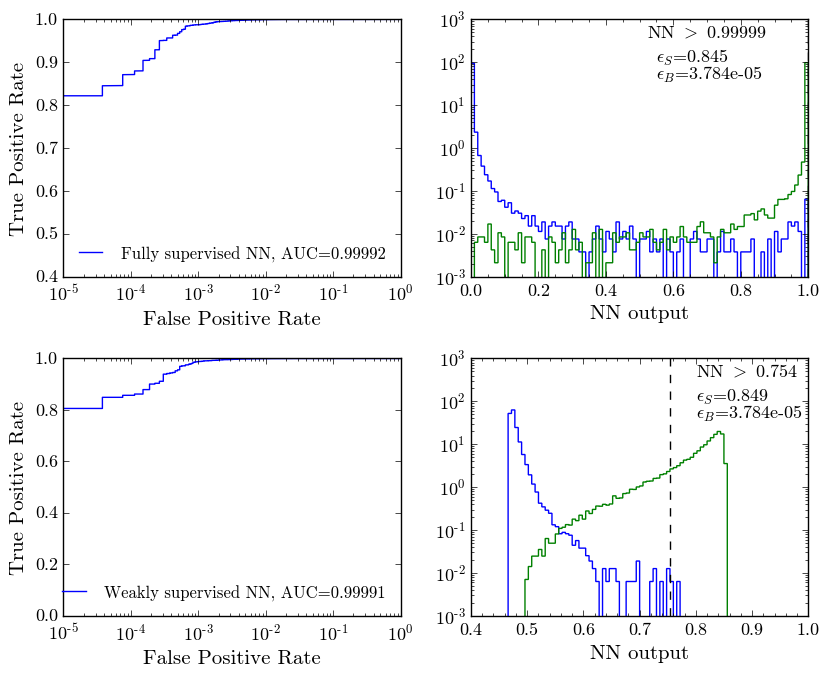

In [24]:
#Long plot code, unfold if you want to see it
plt.figure(figsize=(8.5,7))
plt.subplot(2,2,1)
plt.plot(fprFull_1st,tprFull_1st,label='Fully supervised NN, AUC={0:.5f}'.format(auc_scoreFull_1st))
plt.legend(loc='lower right',frameon=False,fontsize=12)
plt.xscale('log')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
# plt.ylim(1e-6,1)

plt.subplot(2,2,2)
plt.hist(FullTestPredictions[test_y_1st==0],bins=100,range=(0,1),normed=True,histtype='step')
plt.hist(FullTestPredictions[test_y_1st==1],bins=100,range=(0,1),normed=True,histtype='step')
plt.yscale('log')
plt.xlim(0,1)
plt.ylim(1e-3,1e3)
plt.vlines(FullThresholdSet,1e-3,1e3,linestyle='--')
plt.xlabel('NN output')

plt.text(.7,400,r"NN $>$ {0:.5f}".format(FullThresholdSet),ha='center')
plt.text(0.55,100,r'$\epsilon_{S}$'+'={0:.3f}'.format(float(sum(FullTestPredictions[test_y_1st==1]>FullThresholdSet)[0])/sum(test_y_1st==1))
        ,ha='left')
plt.text(0.55,40,r'$\epsilon_{B}$'+'={0:.3e}'.format(float(sum(FullTestPredictions[test_y_1st==0]>FullThresholdSet)[0])/sum(test_y_1st==0))
        ,ha='left')
plt.minorticks_on()

#######################
plt.subplot(2,2,3)
plt.plot(fprWeak_1st,tprWeak_1st,label='Weakly supervised NN, AUC={0:.5f}'.format(auc_scoreWeak_1st))
plt.legend(loc='lower right',frameon=False,fontsize=12)
plt.xscale('log')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
# plt.ylim(1e-6,1)

plt.subplot(2,2,4)
plt.hist(WeakTestPredictions[test_y_1st==0],bins=100,range=(.4,1),normed=True,histtype='step')
plt.hist(WeakTestPredictions[test_y_1st==1],bins=100,range=(.4,1),normed=True,histtype='step')
plt.yscale('log')
plt.xlim(.4,1)
plt.xlabel('NN output')
plt.ylim(1e-3,1e3)
plt.vlines(WeakThresholdSet_1st,1e-3,1e3,linestyle='--')

plt.text(.8,400,r"NN $>$ {0:.3f}".format(WeakThresholdSet_1st),ha='left')
plt.text(0.8,100,r'$\epsilon_{S}$'+'={0:.3f}'.format(float(sum(WeakTestPredictions[test_y_1st==1]>WeakThresholdSet_1st)[0])/sum(test_y_1st==1))
        ,ha='left')
plt.text(0.8,40,r'$\epsilon_{B}$'+'={0:.3e}'.format(float(sum(WeakTestPredictions[test_y_1st==0]>WeakThresholdSet_1st)[0])/sum(test_y_1st==0))
        ,ha='left')
plt.minorticks_on()
plt.tight_layout()

We see that the Fully supervised network has a slightly beter AUC, but that for a $\epsilon_B=3.78\text{e}-05$, the Weakly supervised actually allows more signal through. This test is using Monte Carlo generated background that does not extend up to large values of missing energy (not enough events are created). To alleviate this, we test the models against a background set that is created with weighted events to get a larger range of coverage.

## Load the weighted events

In [25]:
ZJet_weighted = pd.read_csv('../Data/Z_Jets_data_with_weights_1.txt',dtype=float)
X_z_scaled = scaler1st.transform(ZJet_weighted[x_cols])

In [26]:
# Predictions
Full_Weighted_predictions = FullySupervisedModel.predict_proba(X_z_scaled)
Weak_Weighted_predictions = WeaklySupervisedModel.predict_proba(X_z_scaled)

# GluinoPairProduction
GluinoFull = FullySupervisedModel.predict(scaler1st.transform(Gluinos_1stGen[x_cols]))
GluinoWeak = WeaklySupervisedModel.predict(scaler1st.transform(Gluinos_1stGen[x_cols]))

873056/875532 [============================>.] - ETA: 0s

Make a plot of the differential cross section with respect to the Neural Net Output and the missing energy. First get the weighted cross sections passing the cut thresholds.

In [27]:
#Weak model surviving cross sections
backgroundxs_Weak=ZJet_weighted[Weak_Weighted_predictions>WeakThresholdSet_1st]['weight'].sum()*1000
gluinoxs_Weak=Gluinos_1stGen[GluinoWeak>WeakThresholdSet_1st]['weight'].sum()*1000

# Full model survivng cross sections
backgroundxs_Full=ZJet_weighted[Full_Weighted_predictions>FullThresholdSet]['weight'].sum()*1000
gluinoxs_Full=Gluinos_1stGen[GluinoFull>FullThresholdSet]['weight'].sum()*1000

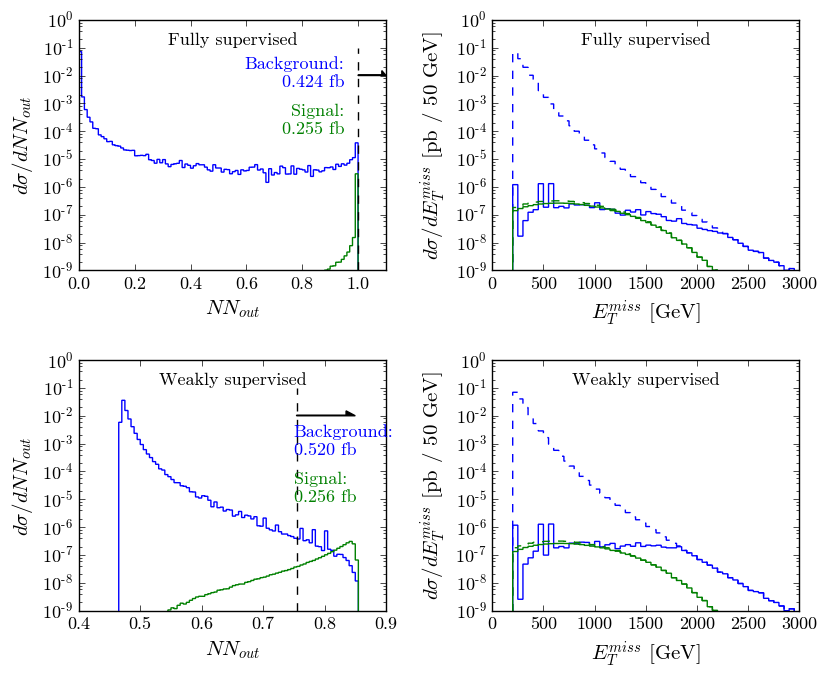

In [28]:
#Long plot code
plt.figure(figsize=(8.5,7))

#*********************
#FullModel - NNout
#*********************
plt.subplot(2,2,1)

plt.hist(Full_Weighted_predictions,
         weights=ZJet_weighted['weight']/100,
         bins=100,
         range=(0,1),
         histtype='step'
        )
plt.hist(GluinoFull,weights=Gluinos_1stGen['weight']/100,
         bins=100,
         range=(0,1),
         histtype='step'
        )
plt.vlines(FullThresholdSet,1e-9,1e-1,linestyles='--')
# plt.arrow(WeakThresholdSet_1st,1e-2,.9-WeakThresholdSet_1st,0,length_includes_head=True,
#           head_width=0.009,fc='black',shape='left')
plt.arrow(FullThresholdSet,1e-2,1.1-FullThresholdSet,0,length_includes_head=True,
          head_width=0.01,fc='black',shape='right')



plt.text(0.95,5e-2,"Background:\n{0:.3f} fb".format(backgroundxs_Full),va='top',color='blue',ha='right')
plt.text(0.95,1e-3,"Signal:\n{0:.3f} fb".format(gluinoxs_Full),va='top',color='green',ha='right')

plt.yscale('log')
plt.ylim(1e-9,1)
plt.xlim(0,1.1)
# plt.ylim(1e-10,1e-1)
plt.ylabel(r'$d\sigma/dNN_{out}$')
plt.xlabel(r'$NN_{out}$')
plt.text(1.1/2,0.2,"Fully supervised",ha='center',va='center')

#*********************
#FullModel - MET
#*********************
plt.subplot(2,2,2)

plt.hist(ZJet_weighted['MET'],
         weights=ZJet_weighted['weight']/50,
         bins=60,range=(200,3200),
         histtype='step',
         color='blue',
         ls='--'
        )
plt.hist(ZJet_weighted[Full_Weighted_predictions>FullThresholdSet]['MET'],
         weights=ZJet_weighted[Full_Weighted_predictions>FullThresholdSet]['weight']/50,
         bins=60,range=(200,3200),
         histtype='step',
         color='blue'
        )

plt.hist(Gluinos_1stGen[GluinoFull > FullThresholdSet]['MET'],
         weights=Gluinos_1stGen[GluinoFull > FullThresholdSet]['weight']/50,
         bins=60,range=(200,3200),
         histtype='step',
         color='green'
        )
plt.hist(Gluinos_1stGen['MET'],
         weights=Gluinos_1stGen['weight']/50,
         bins=60,range=(200,3200),
         histtype='step',
         color='green',
         ls='--'
        )

plt.yscale('log')
plt.ylim(1e-9,1)
plt.ylabel(r'$d\sigma/dE_T^{miss}$ [pb / 50 GeV]')
plt.xlabel(r'$E_T^{miss}$ [GeV]')
plt.xlim(0,3000)
plt.text(1500,0.2,"Fully supervised",ha='center',va='center')


#*********************
#WeakModel - NNout
#*********************
plt.subplot(2,2,3)
plt.hist(Weak_Weighted_predictions,
         weights=ZJet_weighted['weight']/100,
         bins=100,
         range=(.4,.9),
         histtype='step'
        )
plt.hist(GluinoWeak,weights=Gluinos_1stGen['weight']/100,
         bins=100,
         range=(.4,.9),
         histtype='step'
        )
plt.vlines(WeakThresholdSet_1st,1e-9,1e-1,linestyles='--')
# plt.arrow(WeakThresholdSet_1st,1e-2,.9-WeakThresholdSet_1st,0,length_includes_head=True,
#           head_width=0.009,fc='black',shape='left')
plt.arrow(WeakThresholdSet_1st,1e-2,.85-WeakThresholdSet_1st,0,length_includes_head=True,
          head_width=0.01,fc='black',shape='right')



plt.text(0.75,5e-3,"Background:\n{0:.3f} fb".format(backgroundxs_Weak),va='top',color='blue')
plt.text(0.75,1e-4,"Signal:\n{0:.3f} fb".format(gluinoxs_Weak),va='top',color='green')

plt.yscale('log')
plt.ylim(1e-9,1)
plt.xlim(.4,.9)
# plt.ylim(1e-10,1e-1)
plt.ylabel(r'$d\sigma/dNN_{out}$')
plt.xlabel(r'$NN_{out}$')
plt.text((.4+.9)/2,0.2,"Weakly supervised",ha='center',va='center')

#*********************
#WeakModel - MET
#*********************
plt.subplot(2,2,4)
plt.hist(ZJet_weighted['MET'],
         weights=ZJet_weighted['weight']/50,
         bins=60,range=(200,3200),
         histtype='step',
         color='blue',
         ls='--'
        )
plt.hist(ZJet_weighted[Weak_Weighted_predictions > WeakThresholdSet_1st]['MET'],
         weights=ZJet_weighted[Weak_Weighted_predictions > WeakThresholdSet_1st]['weight']/50,
         bins=60,range=(200,3200),
         histtype='step',
         color='blue'
        )

plt.hist(Gluinos_1stGen[GluinoWeak > WeakThresholdSet_1st]['MET'],
         weights=Gluinos_1stGen[GluinoWeak > WeakThresholdSet_1st]['weight']/50,
         bins=60,range=(200,3200),
         histtype='step',
         color='green'
        )
plt.hist(Gluinos_1stGen['MET'],
         weights=Gluinos_1stGen['weight']/50,
         bins=60,range=(200,3200),
         histtype='step',
         color='green',
         ls='--'
        )

plt.yscale('log')
plt.ylim(1e-9,1)
plt.ylabel(r'$d\sigma/dE_T^{miss}$ [pb / 50 GeV]')
plt.xlabel(r'$E_T^{miss}$ [GeV]')
plt.xlim(0,3000)
plt.text(1500,0.2,"Weakly supervised",ha='center',va='center')


#****************
# Final part
#****************

plt.tight_layout()

That seems to work well for both networks. Now that we have more statistics, let's up the cut on the neural network output.

In [29]:
# Find where the weak network lets through equal signal and background
x = np.linspace(.81,.87,50)
weak_xs_diff=[]
for xi in x:
    gluino_weak_xs = Gluinos_1stGen[GluinoWeak>xi]['weight'].sum()*1000
    background_weak_xs = ZJet_weighted[Weak_Weighted_predictions>xi]['weight'].sum()*1000
    weak_xs_diff.append(background_weak_xs-gluino_weak_xs)
WeakThreshold_New = .81#x[np.argmin(np.abs(weak_xs_diff))]
gluinoxs_Weak=Gluinos_1stGen[GluinoWeak>WeakThreshold_New]['weight'].sum()*1000
backgroundxs_Weak=ZJet_weighted[Weak_Weighted_predictions>WeakThreshold_New]['weight'].sum()*1000
print "The threshold is: {0}".format(WeakThreshold_New)
print "The cross section for signal is then:    {0} fb".format(gluinoxs_Weak)
print "The cross section for background is then {0} fb".format(backgroundxs_Weak)

The threshold is: 0.81
The cross section for signal is then:    0.178985152866 fb
The cross section for background is then 0.066940329516 fb


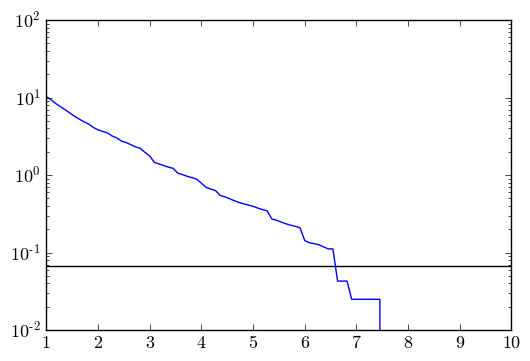

0.999999768987 0.81


In [30]:
# Find the most similar cut in the fully supervised network
x = np.linspace(1,10,100)
y = []
xt=[]
for xi in x:
    xt.append(2 - np.exp(10**(-xi)))
    y.append(ZJet_weighted[Full_Weighted_predictions>xt[-1]]['weight'].sum()*1000 )
minval = np.argmin(abs(np.array(y)-backgroundxs_Weak))
plt.plot(x,y)
plt.hlines(backgroundxs_Weak,1,10)
plt.yscale('log')
plt.show()

FullThreshold_New = xt[minval]
print FullThreshold_New, WeakThreshold_New

In [31]:
# Full model survivng cross sections
backgroundxs_Full=ZJet_weighted[Full_Weighted_predictions>FullThreshold_New]['weight'].sum()*1000
gluinoxs_Full=Gluinos_1stGen[GluinoFull>FullThreshold_New]['weight'].sum()*1000

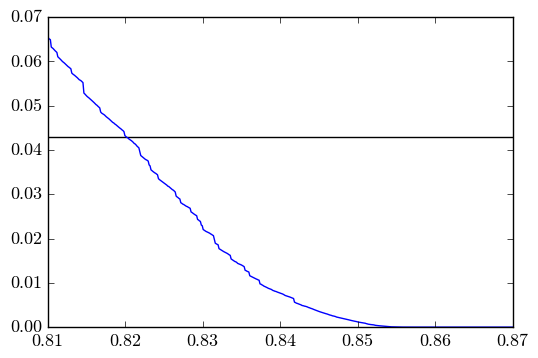

The threshold is: 0.820220440882
The cross section for signal is then:    0.150164381224 fb
The cross section for background is then 0.042854442904 fb


In [32]:
# Finally get the weak threshold which matches the full background
x = np.linspace(.81,.87,500)
weak_b_background=[]
for xi in x:
    gluino_weak_xs = Gluinos_1stGen[GluinoWeak>xi]['weight'].sum()*1000
    background_weak_xs = ZJet_weighted[Weak_Weighted_predictions>xi]['weight'].sum()*1000
    weak_b_background.append(background_weak_xs)

plt.plot(x,weak_b_background)
plt.hlines(backgroundxs_Full,.81,.87)
plt.show()

WeakThreshold_New = x[np.argmin(abs(np.array(weak_b_background)-backgroundxs_Full))]

#Weak model surviving cross sections

gluinoxs_Weak=Gluinos_1stGen[GluinoWeak>WeakThreshold_New]['weight'].sum()*1000
backgroundxs_Weak=ZJet_weighted[Weak_Weighted_predictions>WeakThreshold_New]['weight'].sum()*1000
print "The threshold is: {0}".format(WeakThreshold_New)
print "The cross section for signal is then:    {0} fb".format(gluinoxs_Weak)
print "The cross section for background is then {0} fb".format(backgroundxs_Weak)

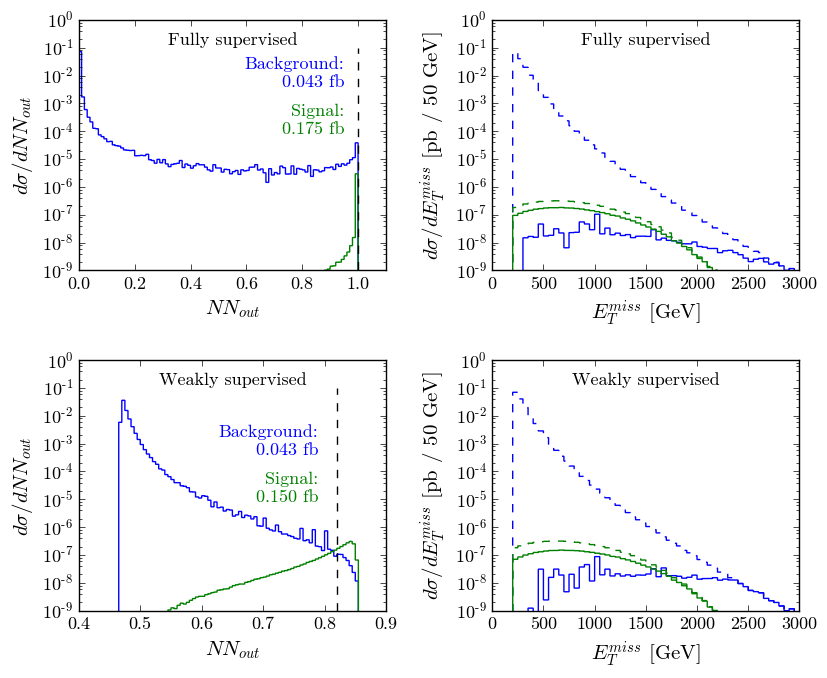

In [33]:
# Plot with the new thresholds
plt.figure(figsize=(8.5,7))

#*********************
#FullModel - NNout
#*********************
plt.subplot(2,2,1)

plt.hist(Full_Weighted_predictions,
         weights=ZJet_weighted['weight']/100,
         bins=100,
         range=(0,1),
         histtype='step'
        )
plt.hist(GluinoFull,weights=Gluinos_1stGen['weight']/100,
         bins=100,
         range=(0,1),
         histtype='step'
        )
plt.vlines(FullThreshold_New,1e-9,1e-1,linestyles='--')
# plt.arrow(WeakThreshold_New,1e-2,.9-WeakThreshold_New,0,length_includes_head=True,
#           head_width=0.009,fc='black',shape='left')
# plt.arrow(FullThreshold_New,1e-2,1.05-FullThreshold_New,0,length_includes_head=True,
#           head_width=0.01,fc='black',shape='right')



plt.text(0.95,5e-2,"Background:\n{0:.3f} fb".format(backgroundxs_Full),va='top',color='blue',ha='right')
plt.text(0.95,1e-3,"Signal:\n{0:.3f} fb".format(gluinoxs_Full),va='top',color='green',ha='right')

plt.yscale('log')
plt.ylim(1e-9,1)
plt.xlim(0,1.1)
# plt.ylim(1e-10,1e-1)
plt.ylabel(r'$d\sigma/dNN_{out}$')
plt.xlabel(r'$NN_{out}$')
plt.text(1.1/2,0.2,"Fully supervised",ha='center',va='center')

#*********************
#FullModel - MET
#*********************
plt.subplot(2,2,2)

plt.hist(ZJet_weighted['MET'],
         weights=ZJet_weighted['weight']/50,
         bins=60,range=(200,3200),
         histtype='step',
         color='blue',
         ls='--'
        )
plt.hist(ZJet_weighted[Full_Weighted_predictions>FullThreshold_New]['MET'],
         weights=ZJet_weighted[Full_Weighted_predictions>FullThreshold_New]['weight']/50,
         bins=60,range=(200,3200),
         histtype='step',
         color='blue'
        )

plt.hist(Gluinos_1stGen[GluinoFull > FullThreshold_New]['MET'],
         weights=Gluinos_1stGen[GluinoFull > FullThreshold_New]['weight']/50,
         bins=60,range=(200,3200),
         histtype='step',
         color='green'
        )
plt.hist(Gluinos_1stGen['MET'],
         weights=Gluinos_1stGen['weight']/50,
         bins=60,range=(200,3200),
         histtype='step',
         color='green',
         ls='--'
        )

plt.yscale('log')
plt.ylim(1e-9,1)
plt.ylabel(r'$d\sigma/dE_T^{miss}$ [pb / 50 GeV]')
plt.xlabel(r'$E_T^{miss}$ [GeV]')
plt.xlim(0,3000)
plt.text(1500,0.2,"Fully supervised",ha='center',va='center')


#*********************
#WeakModel - NNout
#*********************
plt.subplot(2,2,3)
plt.hist(Weak_Weighted_predictions,
         weights=ZJet_weighted['weight']/100,
         bins=100,
         range=(.4,.9),
         histtype='step'
        )
plt.hist(GluinoWeak,weights=Gluinos_1stGen['weight']/100,
         bins=100,
         range=(.4,.9),
         histtype='step'
        )
plt.vlines(WeakThreshold_New,1e-9,1e-1,linestyles='--')
# plt.arrow(WeakThreshold_New,1e-2,.9-WeakThreshold_New,0,length_includes_head=True,
#           head_width=0.009,fc='black',shape='left')
# plt.arrow(WeakThreshold_New,1e-2,.85-WeakThreshold_New,0,length_includes_head=True,
#           head_width=0.01,fc='black',shape='right')



plt.text(0.79,5e-3,"Background:\n{0:.3f} fb".format(backgroundxs_Weak),va='top',color='blue',ha='right')
plt.text(0.79,1e-4,"Signal:\n{0:.3f} fb".format(gluinoxs_Weak),va='top',color='green',ha='right')

plt.yscale('log')
plt.ylim(1e-9,1)
plt.xlim(.4,.9)
# plt.ylim(1e-10,1e-1)
plt.ylabel(r'$d\sigma/dNN_{out}$')
plt.xlabel(r'$NN_{out}$')
plt.text((.4+.9)/2,0.2,"Weakly supervised",ha='center',va='center')

#*********************
#WeakModel - MET
#*********************
plt.subplot(2,2,4)
plt.hist(ZJet_weighted['MET'],
         weights=ZJet_weighted['weight']/50,
         bins=60,range=(200,3200),
         histtype='step',
         color='blue',
         ls='--'
        )
plt.hist(ZJet_weighted[Weak_Weighted_predictions > WeakThreshold_New]['MET'],
         weights=ZJet_weighted[Weak_Weighted_predictions > WeakThreshold_New]['weight']/50,
         bins=60,range=(200,3200),
         histtype='step',
         color='blue'
        )

plt.hist(Gluinos_1stGen[GluinoWeak > WeakThreshold_New]['MET'],
         weights=Gluinos_1stGen[GluinoWeak > WeakThreshold_New]['weight']/50,
         bins=60,range=(200,3200),
         histtype='step',
         color='green'
        )
plt.hist(Gluinos_1stGen['MET'],
         weights=Gluinos_1stGen['weight']/50,
         bins=60,range=(200,3200),
         histtype='step',
         color='green',
         ls='--'
        )

plt.yscale('log')
plt.ylim(1e-9,1)
plt.ylabel(r'$d\sigma/dE_T^{miss}$ [pb / 50 GeV]')
plt.xlabel(r'$E_T^{miss}$ [GeV]')
plt.xlim(0,3000)
plt.text(1500,0.2,r"Weakly supervised",ha='center',va='center')


#****************
# Final part
#****************
plt.tight_layout()

## Pseudo mis-modeling
Let some of the events in the signal sample get labeled as background and some of the background get labeled as signal. Re-train and then see how the results compare.

In [34]:
# let ~ 15% of the events get re-classified.
LowerFlipThreshold = thresh_1st[np.argmin(abs(fprFull_1st - 0.10))]
UpperFlipThreshold = thresh_1st[np.argmin(abs((1-tprFull_1st) - 0.15))]
print LowerFlipThreshold, UpperFlipThreshold

0.00422103 0.999984


In [35]:
y_flipped = np.zeros(len(x_train_1st))
# random_nums = np.random.random(len(y_flipped))
background_flipped = 0
signal_flipped = 0
# Check the backgrounds. If output divided by the threshold set above is greater than the random number, then flip
for i in range(len(y_flipped)):
    if Y_TRAIN_1st[i]==0:
        if  FullTrainPredictions[i]/LowerFlipThreshold > 1: 
            y_flipped[i]=1
            background_flipped+=1
    if Y_TRAIN_1st[i]==1:
        if (1-FullTrainPredictions[i])/(1-UpperFlipThreshold)>1: 
            y_flipped[i]=1
            signal_flipped +=1
#     if i%(len(Y_TRAIN_1st)/50) ==0:
#         print i, float(i)/len(Y_TRAIN_1st)
print
print float(sum(y_flipped)) / len(y_flipped) * 100, '% of the events got flipped'
print signal_flipped, float(signal_flipped) / sum(Y_TRAIN_1st==1)
print background_flipped, float(background_flipped) / sum(Y_TRAIN_1st==0)

train_flipped = abs(Y_TRAIN_1st - y_flipped)


13.9219795262 % of the events got flipped
51354 0.150685293263
22588 0.118688062886


In [36]:
y_flipped_valid = np.zeros(len(x_valid_1st))
# random_nums_valid = np.random.random(len(y_flipped_valid))
background_flipped_valid = 0
signal_flipped_valid = 0
# Check the backgrounds. If output divided by the threshold set above is greater than the random number, then flip
for i in range(len(y_flipped_valid)):
    if Y_VALID_1st[i]==0:
        if  FullValidPredictions[i]/LowerFlipThreshold > 1: 
            y_flipped_valid[i]=1
            background_flipped_valid+=1
    if Y_VALID_1st[i]==1:
        if (1-FullValidPredictions[i])/(1-UpperFlipThreshold) > 1: 
            y_flipped_valid[i]=1
            signal_flipped_valid +=1
#     if i%(len(Y_TRAIN_1st)/50) ==0:
#         print i, float(i)/len(Y_TRAIN_1st)
print
print float(sum(y_flipped_valid)) / len(y_flipped_valid) * 100, '% of the events got flipped'
print signal_flipped_valid, float(signal_flipped_valid) / sum(Y_VALID_1st==1)
print background_flipped_valid, float(background_flipped_valid) / sum(Y_VALID_1st==0)

valid_flipped = abs(Y_VALID_1st - y_flipped_valid)


13.8627805392 % of the events got flipped
12881 0.151148191174
5526 0.116192518766


Quick histogram of the flipping, shows the new distributions

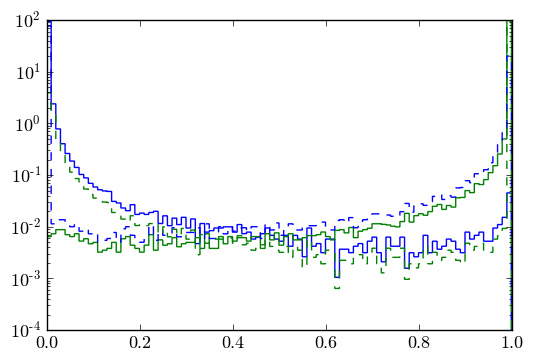

In [37]:
plt.hist(FullTrainPredictions[Y_TRAIN_1st==0], range=(0,1),bins=100,normed=True,histtype='step')
plt.hist(FullTrainPredictions[Y_TRAIN_1st==1], range=(0,1),bins=100,normed=True,histtype='step')

plt.hist(FullTrainPredictions[train_flipped==0],range=(0,1),bins=100,normed=True,histtype='step',color='blue',linestyle='--')
plt.hist(FullTrainPredictions[train_flipped==1],range=(0,1),bins=100,normed=True,histtype='step',color='green',linestyle='--')

plt.yscale('log')
plt.show()

Now split the data up into A and B sets in the same way as before.

In [38]:
# Training set for weak
length_0_1st_Mislabel = sum(train_flipped==0)
length_1_1st_Mislabel = sum(train_flipped==1)
# Set A: 80% of total background and 40% of total signal
set_a_0_Mislabel = x_train_1st[train_flipped==0][:int(0.8*length_0_1st_Mislabel)]
set_a_1_Mislabel = x_train_1st[train_flipped==1][:int(0.4*length_1_1st_Mislabel)]
percentage_a_Mislabel = (0.4*length_1_1st_Mislabel)/(0.4*length_1_1st_Mislabel+0.8*length_0_1st_Mislabel)
print "Percentage of signal for set A:", percentage_a_Mislabel
set_a_Mislabel = np.vstack([set_a_0_Mislabel,set_a_1_Mislabel])
set_a_percentages_Mislabel = np.ones(set_a_Mislabel.shape[0])*percentage_a_Mislabel
set_a_truth_Mislabel = np.append(np.zeros(int(0.8*length_0_1st_Mislabel)),np.ones(int(0.4*length_1_1st_Mislabel)))
print len(set_a_truth_Mislabel),len(set_a_Mislabel),len(set_a_percentages_Mislabel)

Percentage of signal for set A: 0.415940079739
300078 300078 300078


In [39]:
# Set B: 80% of total background and 40% of total signal
set_b_0_Mislabel = x_train_1st[train_flipped==0][int(0.8*length_0_1st_Mislabel):]
set_b_1_Mislabel = x_train_1st[train_flipped==1][int(0.4*length_1_1st_Mislabel):]
percentage_b_Mislabel = (0.6*length_1_1st_Mislabel)/(0.6*length_1_1st_Mislabel+0.2*length_0_1st_Mislabel)
print "Percentage of signal for set B:", percentage_b_Mislabel
set_b_Mislabel = np.vstack([set_b_0_Mislabel,set_b_1_Mislabel])
set_b_percentages_Mislabel = np.ones(set_b_Mislabel.shape[0])*percentage_b_Mislabel
set_b_truth_Mislabel = np.append(np.zeros(length_0_1st_Mislabel-int(0.8*length_0_1st_Mislabel)),
                                 np.ones(length_1_1st_Mislabel-int(0.4*length_1_1st_Mislabel)))
print len(set_b_truth_Mislabel),len(set_b_Mislabel),len(set_b_percentages_Mislabel)

Percentage of signal for set B: 0.810351708073
231039 231039 231039


In [40]:
true_a1 = np.sum(Y_TRAIN_1st[train_flipped==0][:int(0.8*length_0_1st_Mislabel)]==1) +  np.sum(Y_TRAIN_1st[train_flipped==1][int(0.4*length_1_1st_Mislabel):]==1)
true_a0 = np.sum(Y_TRAIN_1st[train_flipped==0][:int(0.8*length_0_1st_Mislabel)]==0) +  np.sum(Y_TRAIN_1st[train_flipped==1][int(0.4*length_1_1st_Mislabel):]==0)

true_a_percent = float(true_a1)/(true_a1 + true_a0)
print true_a_percent

0.59265573662


In [41]:
true_b1 = np.sum(Y_TRAIN_1st[train_flipped==0][int(0.8*length_0_1st_Mislabel):]==1) +  np.sum(Y_TRAIN_1st[train_flipped==1][:int(0.4*length_1_1st_Mislabel)]==1)
true_b0 = np.sum(Y_TRAIN_1st[train_flipped==0][int(0.8*length_0_1st_Mislabel):]==0) +  np.sum(Y_TRAIN_1st[train_flipped==1][:int(0.4*length_1_1st_Mislabel)]==0)

true_b_percent = float(true_b1)/(true_b1 + true_b0)
print true_b_percent

0.747037893613


In [42]:
# Validation Set
length_0_1st_Mislabel_v = sum(valid_flipped==0)
length_1_1st_Mislabel_v = sum(valid_flipped==1)
# Set A: 80% of total background and 40% of total signal
set_a_0_Mislabel_v = x_valid_1st[valid_flipped==0][:int(0.8*length_0_1st_Mislabel_v)]
set_a_1_Mislabel_v = x_valid_1st[valid_flipped==1][:int(0.4*length_1_1st_Mislabel_v)]
percentage_a_Mislabel_v = (0.4*length_1_1st_Mislabel_v)/(0.4*length_1_1st_Mislabel_v+0.8*length_0_1st_Mislabel_v)
print "Percentage of signal for set A:", percentage_a_Mislabel_v
set_a_Mislabel_v = np.vstack([set_a_0_Mislabel_v,set_a_1_Mislabel_v])
set_a_percentages_Mislabel_v = np.ones(set_a_Mislabel_v.shape[0])*percentage_a_Mislabel_v
set_a_truth_Mislabel_v = np.append(np.zeros(int(0.8*length_0_1st_Mislabel_v)),np.ones(int(0.4*length_1_1st_Mislabel_v)))
print len(set_a_truth_Mislabel_v),len(set_a_Mislabel_v),len(set_a_percentages_Mislabel_v)

# Set B: 80% of total background and 40% of total signal
set_b_0_Mislabel_v = x_valid_1st[valid_flipped==0][int(0.8*length_0_1st_Mislabel_v):]
set_b_1_Mislabel_v = x_valid_1st[valid_flipped==1][int(0.4*length_1_1st_Mislabel_v):]
percentage_b_Mislabel_v = (0.6*length_1_1st_Mislabel_v)/(0.6*length_1_1st_Mislabel_v+0.2*length_0_1st_Mislabel_v)
print "Percentage of signal for set B:", percentage_b_Mislabel_v
set_b_Mislabel_v = np.vstack([set_b_0_Mislabel_v,set_b_1_Mislabel_v])
set_b_percentages_Mislabel_v = np.ones(set_b_Mislabel_v.shape[0])*percentage_b_Mislabel_v
set_b_truth_Mislabel_v = np.append(np.zeros(length_0_1st_Mislabel_v-int(0.8*length_0_1st_Mislabel_v)),
                                 np.ones(length_1_1st_Mislabel_v-int(0.4*length_1_1st_Mislabel_v)))
print len(set_b_truth_Mislabel_v),len(set_b_Mislabel_v),len(set_b_percentages_Mislabel_v)

Percentage of signal for set A: 0.41485609556
75077 75077 75077
Percentage of signal for set B: 0.809664762644
57703 57703 57703


### Train the networks: Fully supervised

In [43]:
PseudoMisModelFull = Sequential()
PseudoMisModelFull.add(Dense(30, activation="sigmoid", kernel_initializer="normal", input_dim=11))
PseudoMisModelFull.add(Dense(1, activation="sigmoid", kernel_initializer="normal"))
PseudoMisModelFull.compile(loss='binary_crossentropy',optimizer=SGD(lr=0.01))

In [44]:
# On the first run, uncomment the next two lines. This will train the model and save the results
# PseudoMisModelFull.fit(x_train_1st,
#                        train_flipped,
#                        validation_data=(x_valid_1st,valid_flipped))
# PseudoMisModelFull.save('../Data/KerasModelWeights/PseudoMisModelFull.h5')
PseudoMisModelFull.load_weights('../Data/KerasModelWeights/PseudoMisModelFull.h5')

### Weakly supervised

In [45]:
PseduoMisModelWeak = Sequential()
PseduoMisModelWeak.add(Dense(30, activation="sigmoid", kernel_initializer="normal", input_dim=11))
PseduoMisModelWeak.add(Dense(1, activation="sigmoid", kernel_initializer="normal"))
PseduoMisModelWeak.compile(loss=WeakSupervision,optimizer=Adam(lr=0.00001))

In [46]:
# On the first run, uncomment the next lines. This will train the model and save the results
# PseduoMisModelWeak.fit(X_Train_1st, 
#                        np.append(set_a_percentages_Mislabel,set_b_percentages_Mislabel), 
#                        validation_data=(X_Valid_1st,
#                                         np.append(set_a_percentages_Mislabel_v,set_b_percentages_Mislabel_v)
#                                        ),    
#                        batch_size=32, epochs=10)
# PseduoMisModelWeak.save('../Data/KerasModelWeights/PseduoMisModelWeak.h5')
PseduoMisModelWeak.load_weights('../Data/KerasModelWeights/PseduoMisModelWeak.h5')

### Now plot the results of the training

In [47]:
PseduoFullTestPreds = PseudoMisModelFull.predict_proba(x_test_1st)
PseduoWeakTestPreds = PseduoMisModelWeak.predict_proba(x_test_1st)

71968/73765 [============================>.] - ETA: 0s

In [48]:
#ROC Curves
fprFull_Pseudo, tprFull_Pseudo, thresh_Pseudo = metrics.roc_curve(test_y_1st,PseduoFullTestPreds)
auc_PseudoFull = metrics.auc(fprFull_Pseudo,tprFull_Pseudo)
print "Full AUC:",auc_PseudoFull, ", Old score was:",auc_scoreFull_1st

fprWeak_Pseduo, tprWeak_Pseduo, threshWeak_Pseduo = metrics.roc_curve(test_y_1st,PseduoWeakTestPreds)
auc_scoreWeak_Pseduo = metrics.auc(fprWeak_Pseduo,tprWeak_Pseduo)
print "Weak AUC:",auc_scoreWeak_Pseduo, ", Old score was:",auc_scoreWeak_1st

Full AUC: 0.958387674876 , Old score was: 0.999921512012
Weak AUC: 0.99991273868 , Old score was: 0.999908893553


In [49]:
print "Mis-classification led to a change of {0:.5f}% in the Fully supervised network".format(
    (auc_scoreFull_1st-auc_PseudoFull)/auc_scoreFull_1st*100)
print "Mis-classification led to a change of {0:.5f}% in the Weakly supervised network".format(
    (auc_scoreWeak_1st-auc_scoreWeak_Pseduo)/auc_scoreWeak_1st*100)

Mis-classification led to a change of 4.15371% in the Fully supervised network
Mis-classification led to a change of -0.00038% in the Weakly supervised network


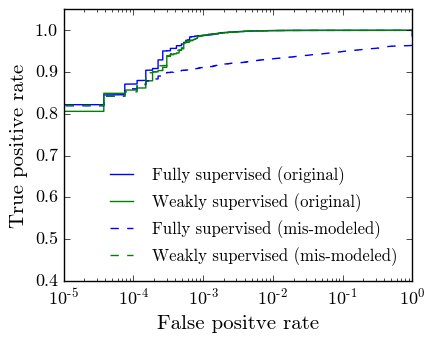

In [50]:
plt.figure(figsize=(4.5,3.5))
plt.plot(fprFull_1st,tprFull_1st, label='Fully supervised (original)')
plt.plot(fprWeak_1st,tprWeak_1st, label='Weakly supervised (original)')

plt.plot(fprFull_Pseudo, tprFull_Pseudo, color='blue',linestyle='--', label='Fully supervised (mis-modeled)')
plt.plot(fprWeak_Pseduo, tprWeak_Pseduo, color='green',linestyle='--', label='Weakly supervised (mis-modeled)')

# plt.xlim(-0.1,1.1)
plt.ylim(.4,1.05)
plt.xscale('log')
plt.legend(loc='lower right', frameon=False, fontsize=12)
plt.xlabel('False positve rate')
plt.ylabel('True positive rate')
plt.show()

In [51]:
# Predictions
Full_Weighted_predictions_Pseudo = PseudoMisModelFull.predict_proba(X_z_scaled)
Weak_Weighted_predictions_Pseudo = PseduoMisModelWeak.predict_proba(X_z_scaled)

# GluinoPairProduction
GluinoFull_Pseudo = PseudoMisModelFull.predict(scaler1st.transform(Gluinos_1stGen[x_cols]))
GluinoWeak_Pseudo = PseduoMisModelWeak.predict(scaler1st.transform(Gluinos_1stGen[x_cols]))

871744/875532 [============================>.] - ETA: 0s

In [52]:
#Find the new thresholds
pseduoThreshNum = np.mean([1,np.mean([max(thresh_Pseudo),thresh_Pseudo[np.argmin(abs(tprFull_Pseudo - 0.832))]])])
pseduoThreshNumWeak = np.mean([max(threshWeak_Pseduo),np.mean([max(threshWeak_Pseduo),threshWeak_Pseduo[np.argmin(abs(tprWeak_Pseduo - 0.832))]])])
print pseduoThreshNum, pseduoThreshNumWeak

0.914969831705 0.797463


In [53]:
#Weak model surviving cross sections
backgroundxs_Weak=ZJet_weighted[Weak_Weighted_predictions_Pseudo>pseduoThreshNumWeak]['weight'].sum()*1000
gluinoxs_Weak=Gluinos_1stGen[GluinoWeak_Pseudo>pseduoThreshNumWeak]['weight'].sum()*1000

# Full model survivng cross sections
backgroundxs_Full=ZJet_weighted[Full_Weighted_predictions_Pseudo>pseduoThreshNum]['weight'].sum()*1000
gluinoxs_Full=Gluinos_1stGen[GluinoFull_Pseudo>pseduoThreshNum]['weight'].sum()*1000

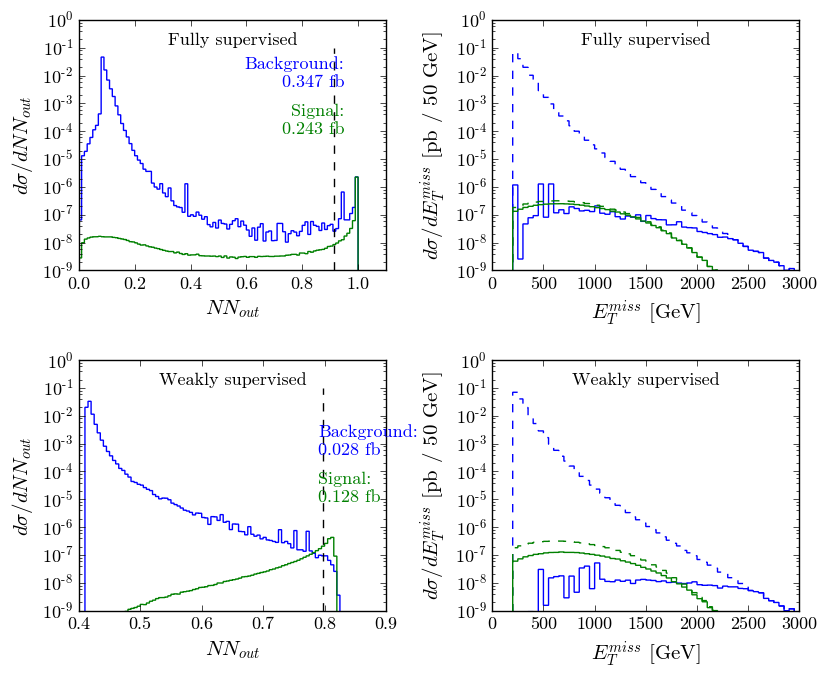

In [54]:
# Plots
plt.figure(figsize=(8.5,7))

#*********************
#FullModel - NNout
#*********************
plt.subplot(2,2,1)

plt.hist(Full_Weighted_predictions_Pseudo,
         weights=ZJet_weighted['weight']/100,
         bins=100,
         range=(0,1),
         histtype='step'
        )
plt.hist(GluinoFull_Pseudo,weights=Gluinos_1stGen['weight']/100,
         bins=100,
         range=(0,1),
         histtype='step'
        )
plt.vlines(pseduoThreshNum,1e-9,1e-1,linestyles='--')


plt.text(0.95,5e-2,"Background:\n{0:.3f} fb".format(backgroundxs_Full),va='top',color='blue',ha='right')
plt.text(0.95,1e-3,"Signal:\n{0:.3f} fb".format(gluinoxs_Full),va='top',color='green',ha='right')

plt.yscale('log')
plt.ylim(1e-9,1)
plt.xlim(0,1.1)
# plt.ylim(1e-10,1e-1)
plt.ylabel(r'$d\sigma/dNN_{out}$')
plt.xlabel(r'$NN_{out}$')
plt.text(1.1/2,0.2,"Fully supervised",ha='center',va='center')

#*********************
#FullModel - MET
#*********************
plt.subplot(2,2,2)

plt.hist(ZJet_weighted['MET'],
         weights=ZJet_weighted['weight']/50,
         bins=60,range=(200,3200),
         histtype='step',
         color='blue',
         ls='--'
        )
plt.hist(ZJet_weighted[Full_Weighted_predictions_Pseudo>pseduoThreshNum]['MET'],
         weights=ZJet_weighted[Full_Weighted_predictions_Pseudo>pseduoThreshNum]['weight']/50,
         bins=60,range=(200,3200),
         histtype='step',
         color='blue'
        )

plt.hist(Gluinos_1stGen[GluinoFull_Pseudo > pseduoThreshNum]['MET'],
         weights=Gluinos_1stGen[GluinoFull_Pseudo > pseduoThreshNum]['weight']/50,
         bins=60,range=(200,3200),
         histtype='step',
         color='green'
        )
plt.hist(Gluinos_1stGen['MET'],
         weights=Gluinos_1stGen['weight']/50,
         bins=60,range=(200,3200),
         histtype='step',
         color='green',
         ls='--'
        )

plt.yscale('log')
plt.ylim(1e-9,1)
plt.ylabel(r'$d\sigma/dE_T^{miss}$ [pb / 50 GeV]')
plt.xlabel(r'$E_T^{miss}$ [GeV]')
plt.xlim(0,3000)
plt.text(1500,0.2,"Fully supervised",ha='center',va='center')


#*********************
#WeakModel - NNout
#*********************
plt.subplot(2,2,3)
plt.hist(Weak_Weighted_predictions_Pseudo,
         weights=ZJet_weighted['weight']/100,
         bins=100,
         range=(.4,.9),
         histtype='step'
        )
plt.hist(GluinoWeak_Pseudo,weights=Gluinos_1stGen['weight']/100,
         bins=100,
         range=(.4,.9),
         histtype='step'
        )
plt.vlines(pseduoThreshNumWeak,1e-9,1e-1,linestyles='--')

plt.text(0.79,5e-3,"Background:\n{0:.3f} fb".format(backgroundxs_Weak),va='top',color='blue')
plt.text(0.79,1e-4,"Signal:\n{0:.3f} fb".format(gluinoxs_Weak),va='top',color='green')

plt.yscale('log')
plt.ylim(1e-9,1)
plt.xlim(.4,.9)
# plt.ylim(1e-10,1e-1)
plt.ylabel(r'$d\sigma/dNN_{out}$')
plt.xlabel(r'$NN_{out}$')
plt.text((.4+.9)/2,0.2,"Weakly supervised",ha='center',va='center')

#*********************
#WeakModel - MET
#*********************
plt.subplot(2,2,4)
plt.hist(ZJet_weighted['MET'],
         weights=ZJet_weighted['weight']/50,
         bins=60,range=(200,3200),
         histtype='step',
         color='blue',
         ls='--'
        )
plt.hist(ZJet_weighted[Weak_Weighted_predictions_Pseudo > pseduoThreshNumWeak]['MET'],
         weights=ZJet_weighted[Weak_Weighted_predictions_Pseudo > pseduoThreshNumWeak]['weight']/50,
         bins=60,range=(200,3200),
         histtype='step',
         color='blue'
        )

plt.hist(Gluinos_1stGen[GluinoWeak_Pseudo > pseduoThreshNumWeak]['MET'],
         weights=Gluinos_1stGen[GluinoWeak_Pseudo > pseduoThreshNumWeak]['weight']/50,
         bins=60,range=(200,3200),
         histtype='step',
         color='green'
        )
plt.hist(Gluinos_1stGen['MET'],
         weights=Gluinos_1stGen['weight']/50,
         bins=60,range=(200,3200),
         histtype='step',
         color='green',
         ls='--'
        )

plt.yscale('log')
plt.ylim(1e-9,1)
plt.ylabel(r'$d\sigma/dE_T^{miss}$ [pb / 50 GeV]')
plt.xlabel(r'$E_T^{miss}$ [GeV]')
plt.xlim(0,3000)
plt.text(1500,0.2,"Weakly supervised",ha='center',va='center')


#****************
# Final part
#****************

plt.tight_layout()

## Check the models against different signals (gluino pair production with decays to 1st generation OR stop pair production)

In [55]:
# Load the 3rd generation decay
Gluinos_3rdGen = pd.read_csv('../Data/Gluino_3rdGen.txt',dtype=float)
Gluinos_3rdGen_scaled = scaler1st.transform(Gluinos_3rdGen[x_cols])
print "Gluino_3 cross section: {0:.3f} fb".format(Gluinos_3rdGen['weight'].sum()*1000)

#Weak model predictions
pred_withWeightsGluino3_weak=WeaklySupervisedModel.predict_proba(Gluinos_3rdGen_scaled, verbose=1)

# Full model predictions
Full_Wieghted_predsGluino3=FullySupervisedModel.predict(Gluinos_3rdGen_scaled)

Gluino_3 cross section: 0.255 fb
400608/400844 [============================>.] - ETA: 0s

In [56]:
# Stops
Stops_weighted = pd.read_csv('../Data/STOPS_1TeV.txt',dtype=float)
X_Stops_scaled = scaler1st.transform(Stops_weighted[x_cols])
print "Stop cross section: {0:.3f} fb".format(Stops_weighted['weight'].sum()*1000)

#Weak model predictions
pred_withWeightsStops=WeaklySupervisedModel.predict_proba(X_Stops_scaled, verbose=1)

# Full model predictions
Full_Wieghted_predsStops=FullySupervisedModel.predict(X_Stops_scaled)

Stop cross section: 1.576 fb
353056/354714 [============================>.] - ETA: 0s

Plot the neural network outputs

In [57]:
# predicitions from the original networks
Full_Weighted_predictions = FullySupervisedModel.predict_proba(X_z_scaled)
Weak_Weighted_predictions = WeaklySupervisedModel.predict_proba(X_z_scaled)

# GluinoPairProduction
GluinoFull = FullySupervisedModel.predict(scaler1st.transform(Gluinos_1stGen[x_cols]))
GluinoWeak = WeaklySupervisedModel.predict(scaler1st.transform(Gluinos_1stGen[x_cols]))

873248/875532 [============================>.] - ETA: 0s

In [58]:
#Weak model surviving cross sections
# backgroundxs_Weak=ZJet_weighted[Weak_Weighted_predictions>WeakThreshold_New]['weight'].sum()*1000
gluinoxs_Weak=Gluinos_1stGen[GluinoWeak>WeakThreshold_New]['weight'].sum()*1000

# Full model survivng cross sections
# backgroundxs_Full=ZJet_weighted[Full_Weighted_predictions>FullThreshold_New]['weight'].sum()*1000
gluinoxs_Full=Gluinos_1stGen[GluinoFull>FullThreshold_New]['weight'].sum()*1000

print gluinoxs_Full, gluinoxs_Weak

0.17547676432 0.150164381224


In [59]:
#Weak model surviving cross sections
backgroundxs_Weak=ZJet_weighted[Weak_Weighted_predictions>WeakThreshold_New]['weight'].sum()*1000
gluinoxs_Weak=Gluinos_1stGen[GluinoWeak>WeakThreshold_New]['weight'].sum()*1000
gluinoxs_Weak_3 = Gluinos_3rdGen[pred_withWeightsGluino3_weak > WeakThreshold_New]['weight'].sum()*1000
stopxs_Weak = Stops_weighted[pred_withWeightsStops > WeakThreshold_New]['weight'].sum()*1000

print backgroundxs_Weak, gluinoxs_Weak, gluinoxs_Weak_3, stopxs_Weak

# Full model survivng cross sections
backgroundxs_Full=ZJet_weighted[Full_Weighted_predictions>FullThreshold_New]['weight'].sum()*1000
gluinoxs_Full=Gluinos_1stGen[GluinoFull>FullThreshold_New]['weight'].sum()*1000
gluinoxs_Full_3 = Gluinos_3rdGen[Full_Wieghted_predsGluino3>FullThreshold_New]['weight'].sum()*1000
stopxs_Full =Stops_weighted[Full_Wieghted_predsStops>FullThreshold_New]['weight'].sum()*1000

print backgroundxs_Full, gluinoxs_Full, gluinoxs_Full_3, stopxs_Full

0.042854442904 0.150164381224 0.0992798069139 0.0106568378
0.042940489992 0.17547676432 0.118562472326 0.016191819


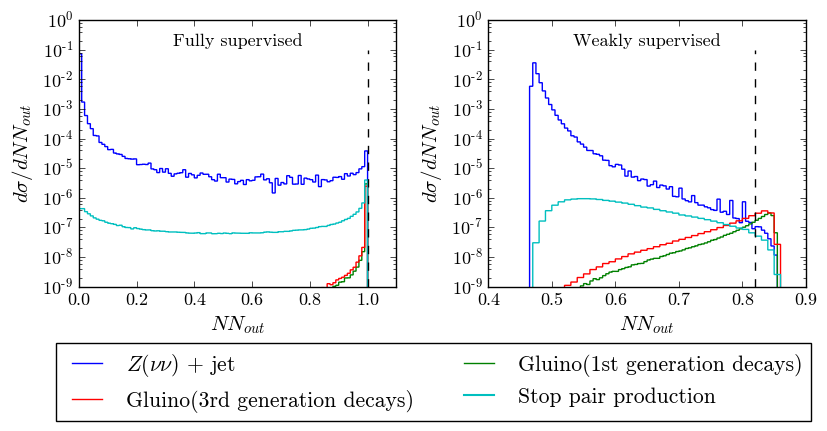

In [60]:
# Plots for the alternative signals
plt.figure(figsize=(8.5,3.7))
plt.subplot(1,2,1)

plt.hist(Full_Weighted_predictions,
         weights=ZJet_weighted['weight']/100,
         bins=100,
         range=(0,1),
         histtype='step'
        )
plt.hist(GluinoFull,weights=Gluinos_1stGen['weight']/100,
         bins=100,
         range=(0,1),
         histtype='step'
        )
plt.hist(Full_Wieghted_predsGluino3,weights=Gluinos_3rdGen['weight']/100,
         bins=100,
         range=(0,1),
         histtype='step'
        )
plt.hist(Full_Wieghted_predsStops,weights=Stops_weighted['weight']/100,
         bins=100,
         range=(0,1),
         histtype='step'
        )

plt.vlines(FullThreshold_New,1e-9,1e-1,linestyles='--')
# plt.arrow(WeakThreshold_New,1e-2,.9-WeakThreshold_New,0,length_includes_head=True,
#           head_width=0.009,fc='black',shape='left')
# plt.arrow(FullThreshold_New,1e-2,1.05-FullThreshold_New,0,length_includes_head=True,
#           head_width=0.01,fc='black',shape='right')



# plt.text(0.95,5e-2,"Background:\n{0:.3f} fb".format(backgroundxs_Full),va='top',color='blue',ha='right')
# plt.text(0.95,1e-3,"Signal:\n{0:.3f} fb".format(gluinoxs_Full),va='top',color='green',ha='right')

plt.yscale('log')
plt.ylim(1e-9,1)
plt.xlim(0,1.1)
# plt.ylim(1e-10,1e-1)
plt.ylabel(r'$d\sigma/dNN_{out}$')
plt.xlabel(r'$NN_{out}$')
plt.text(1.1/2,0.2,"Fully supervised",ha='center',va='center')

#*********************
#WeakModel - NNout
#*********************
plt.subplot(1,2,2)

plt.hist(Weak_Weighted_predictions,
         weights=ZJet_weighted['weight']/100,
         bins=100,
         range=(.4,.9),
         histtype='step'
        )
plt.hist(GluinoWeak,weights=Gluinos_1stGen['weight']/100,
         bins=100,
         range=(.4,.9),
         histtype='step'
        )
plt.hist(pred_withWeightsGluino3_weak,weights=Gluinos_3rdGen['weight']/100,
         bins=100,
         range=(0,1),
         histtype='step'
        )
plt.hist(pred_withWeightsStops,weights=Stops_weighted['weight']/100,
         bins=100,
         range=(0,1),
         histtype='step'
        )


plt.vlines(WeakThreshold_New,1e-9,1e-1,linestyles='--')
# plt.arrow(WeakThreshold_New,1e-2,.9-WeakThreshold_New,0,length_includes_head=True,
#           head_width=0.009,fc='black',shape='left')
# plt.arrow(WeakThreshold_New,1e-2,.85-WeakThreshold_New,0,length_includes_head=True,
#           head_width=0.01,fc='black',shape='right')

plt.plot([],[],color='blue',label=r'$Z(\nu\nu)$ + jet')
plt.plot([],[],color='red',label='Gluino(3rd generation decays)')
plt.plot([],[],color='green',label='Gluino(1st generation decays)')
plt.plot([],[],color='c',label='Stop pair production',lw=1.5)

plt.yscale('log')
plt.ylim(1e-9,1)
plt.xlim(.4,.9)
# plt.ylim(1e-10,1e-1)
plt.ylabel(r'$d\sigma/dNN_{out}$')
plt.xlabel(r'$NN_{out}$')
plt.text((.4+.9)/2,0.2,"Weakly supervised",ha='center',va='center')

plt.legend(bbox_to_anchor=(1.05, -0.17),ncol=2)

plt.tight_layout()

## Using both neural network outputs together

While both the fully supervised and weakly supervised networks are able to classify the data with remarkable performance, is it true that they agree with one another on an event-by-event basis? If not, we may be able to train a new network using as inputs only the outputs of the full and weakly supervised networks, and not the missing energy or jet momentums.

In [61]:
backgroundxs_Full=ZJet_weighted[Full_Weighted_predictions>FullThreshold_New]['weight'].sum()*1000
gluinoxs_Full=Gluinos_1stGen[GluinoFull>FullThreshold_New]['weight'].sum()*1000

In [62]:
firstZX=scaler1st.transform(ZJet[x_cols])

In [63]:
Z1_Full_pred = FullySupervisedModel.predict(firstZX)
Z1_Weak_pred = WeaklySupervisedModel.predict(firstZX)

In [64]:
# Combine all of the data into one set
BothFull = np.vstack([Full_Weighted_predictions,GluinoFull])
BothFull = BothFull - 1.0e-7
BothFull = np.log10(np.log(2-BothFull))
BothWeak = np.vstack([Weak_Weighted_predictions, GluinoWeak])

In [65]:
#Combine and scale the data
BothX = np.hstack([BothWeak,BothFull])

scaler2 = StandardScaler()
BothX = scaler2.fit_transform(BothX)
BothY = np.append(np.zeros(len(Full_Weighted_predictions)),np.ones(len(GluinoFull)))
BothWeights = np.append(ZJet_weighted['weight'],Gluinos_1stGen['weight'])

GluinoCombinedX = scaler2.transform(np.hstack([GluinoWeak,np.log10(np.log(2-(GluinoFull-1e-7)))]))
BackgroundCombinedX = scaler2.transform(np.hstack([Weak_Weighted_predictions,np.log10(np.log(2-(Full_Weighted_predictions-1e-7)))]))

In [66]:
# We are using the weighted data for training. Re-weight such that the total cross section for
# the background is 5 times that of the signal
TotalBGXS = ZJet_weighted['weight'].sum()
TotalGluinoXS = Gluinos_1stGen['weight'].sum()
print "Total cross sections: {0:.2f}pb (background) and {1:.2f} fb (signal)".format(TotalBGXS, TotalGluinoXS*1000)

BothWeights_train = np.append(
        ZJet_weighted['weight']/TotalBGXS * 1e4 * 100 ,
        Gluinos_1stGen['weight']/TotalGluinoXS * 1e4 
)

print BothWeights_train

Total cross sections: 7.62pb (background) and 0.30 fb (signal)
[ 7.51426058  7.51426058  7.51426058 ...,  0.02112562  0.02112562
  0.02112562]


In [75]:
CombinedModel= Sequential()
CombinedModel.add(Dense(10, 
                        kernel_initializer="normal",
                        activation="sigmoid", 
                        input_dim=2,
                       )
                 )
CombinedModel.add(Dense(1, activation="sigmoid", kernel_initializer="normal"))
CombinedModel.compile(loss='binary_crossentropy',optimizer=Adam(lr=.001))

In [76]:
CombinedModel.fit(BothX, 
                  BothY,
                  sample_weight = BothWeights_train,
                  epochs=5,
                  verbose=1,
                  validation_split = 0.001,
#                   batch_size=1214001/100
                 )

Train on 1347542 samples, validate on 1349 samples
Epoch 1/5
1347542/1347542 [==============================] - 107s - loss: 0.0060 - val_loss: 0.0020
Epoch 2/5
1347542/1347542 [==============================] - 110s - loss: 0.0016 - val_loss: 0.0020
Epoch 3/5
1347542/1347542 [==============================] - 106s - loss: 0.0016 - val_loss: 0.0021
Epoch 4/5
1347542/1347542 [==============================] - 103s - loss: 0.0015 - val_loss: 0.0017
Epoch 5/5
1347542/1347542 [==============================] - 99s - loss: 0.0015 - val_loss: 0.0016


In [77]:
GluinoCombinedPreds = CombinedModel.predict_proba(GluinoCombinedX,batch_size=10000)
BackgroundCombinedPreds = CombinedModel.predict_proba(BackgroundCombinedX,batch_size=10000)

x = np.linspace(2,2.5,1000)
xt = []
y = []
for xi in x:
    xt.append(2 - np.exp(10**(-xi)))
    y.append( ZJet_weighted[BackgroundCombinedPreds>xt[-1]]['weight'].sum()*1000)
#         Gluinos_1stGen[(GluinoCombinedPreds > xi)]['weight'].sum()*1000-gluinoxs_Weak)
minval2 = np.argmin(abs(np.array(y)- 0.0455))
combinedThresh = xt[minval2]
print '\n',combinedThresh, np.log10(np.log(2-combinedThresh))

870000/875532 [============================>.] - ETA: 0s
0.990710864194 -2.03403403403


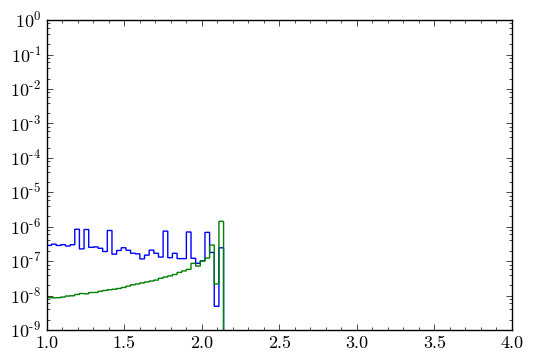

In [78]:
# plt.figure(figsize=(6.8*2,4.8))
# plt.subplot(1,2,1)
# plt.hist(BothPreds[BothY==0],histtype='step',bins=100,normed='True')#,weights=BothWeights[BothY==0]/100)
# plt.hist(BothPreds[BothY==1],histtype='step',bins=100,normed='True')#,weights=BothWeights[BothY==1]/100)
# plt.yscale('log')
# # plt.ylim(1e-9,1)

# plt.subplot(1,2,2)
plt.hist(-np.log10(np.log(2-BackgroundCombinedPreds)),histtype='step',bins=100,range=(1,4),weights=ZJet_weighted['weight']/100)
plt.hist(-np.log10(np.log(2-GluinoCombinedPreds)),histtype='step',bins=100,range=(1,4),weights=Gluinos_1stGen['weight']/100)
plt.yscale('log')
plt.ylim(1e-9,1)
plt.minorticks_on()
plt.show()

In [79]:
# combinedThresh = 2 - np.exp(10**(-3.7))

Background_Combined_XS = ZJet_weighted[BackgroundCombinedPreds> combinedThresh]['weight'].sum()*1000
Signal_Combined_XS = Gluinos_1stGen[GluinoCombinedPreds> combinedThresh]['weight'].sum()*1000

print Signal_Combined_XS, gluinoxs_Weak, gluinoxs_Full, Background_Combined_XS

print combinedThresh, Background_Combined_XS / backgroundxs_Weak

0.17547676432 0.150164381224 0.17547676432 0.042940489992
0.990710864194 1.00200789188


In [80]:
backgroundxs_Full=ZJet_weighted[Full_Weighted_predictions>FullThreshold_New]['weight'].sum()*1000
print backgroundxs_Full, Background_Combined_XS

0.042940489992 0.042940489992


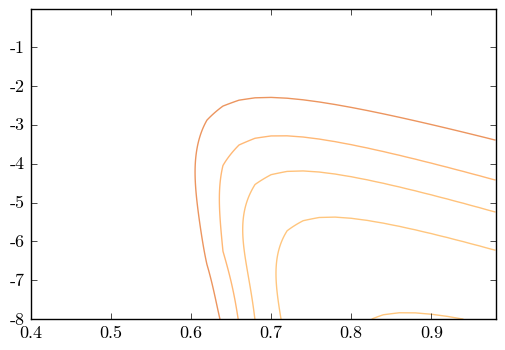

In [81]:
xx, yy = np.meshgrid(np.arange(.4,1, 0.02),
                         np.arange(-8, 0,.02))

cm = plt.cm.RdBu
Z = CombinedModel.predict(scaler2.transform(np.c_[xx.ravel(), yy.ravel()]))
Z = Z.reshape(xx.shape)

plt.contour(xx, yy, Z, cmap="copper",levels=2-np.exp(10**(-1*np.linspace(0,4,10))) )
# plt.scatter(Combined0[:,0],Combined0[:,1])
# plt.xlim(-1.5,2.5)
# plt.ylim(-1,2)
plt.show()

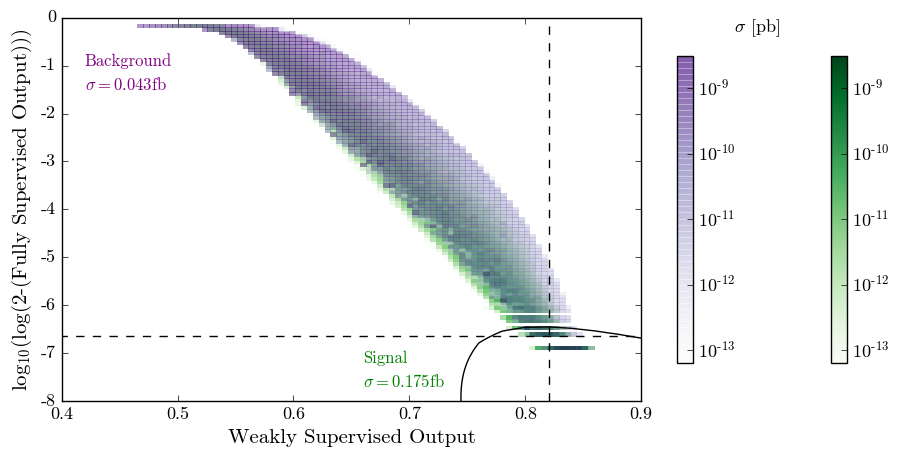

In [82]:
BothX_un = scaler2.inverse_transform(BothX)

hBack,xBack,yBack = np.histogram2d(scaler2.inverse_transform(BackgroundCombinedX)[:,0].flatten(),
                                   scaler2.inverse_transform(BackgroundCombinedX)[:,1].flatten(),
                                   bins=[np.linspace(.4,.9,100),np.linspace(-7,0,100)],
                                   weights=ZJet_weighted['weight']/100**2
                                  )

hSig,xSig,ySig = np.histogram2d(scaler2.inverse_transform(GluinoCombinedX)[:,0].flatten(),
                                scaler2.inverse_transform(GluinoCombinedX)[:,1].flatten(),
                                bins=[np.linspace(.4,.9,100),np.linspace(-7,0,100)],
                                weights=Gluinos_1stGen['weight']/100**2
                                )
hBack=hBack.T
hSig = hSig.T

fig = plt.figure(figsize=(10,4.8))
ax = fig.add_subplot(111)

c1 =ax.pcolor(xSig, ySig, hSig,cmap='Greens',norm=colors.LogNorm(vmin= hSig[hSig>0].min(),
                                                                 vmax= hSig.max()),alpha=1)
c2 =ax.pcolor(xBack, yBack, hBack,cmap='Purples',norm=colors.LogNorm(vmin= hSig[hSig>0].min(),
                                                                     vmax= hSig.max()),alpha=0.4)


cbar1=fig.colorbar(c1,shrink=0.8)
cbar2=fig.colorbar(c2,shrink=0.8)

# plt.contour(xx, yy, Z, cmap="copper",levels=2-np.exp(10**(-1*np.linspace(0,4,10))) )
plt.contour(xx, yy, Z, levels=[combinedThresh], cmap="Greys_r")

plt.vlines(WeakThreshold_New,-8,1,linestyles='--')
plt.hlines(np.log10(np.log(2-FullThreshold_New)),-1.5,2.5,linestyles='--')
plt.text(.98,.0,r'$\sigma$ [pb]',va='top')
plt.ylim(-8,0)
plt.yticks(range(-8,1),range(-8,1))
plt.xlim(.4,.9)
# plt.yscale('log')
plt.xlabel('Weakly Supervised Output')
plt.ylabel(r'log$_{10}$(log(2-(Fully Supervised Output)))')
plt.text(.42,-1,'Background',color='purple',ha='left',fontsize=12)
plt.text(.66,-7.2,'Signal',color='green',ha='left',fontsize=12)

plt.text(.42,-1.5,r'$\sigma=$'+'{0:.3f}fb'.format(Background_Combined_XS),color='purple',ha='left',fontsize=12)
plt.text(.66,-7.7,r'$\sigma=$'+'{0:.3f}fb'.format(Signal_Combined_XS),color='green',ha='left',fontsize=12)
# plt.hlines(np.log(2-ThreshFullB01),0,.6,linestyle='--',color='black')
# plt.vlines(ThreshWeakB01,1e-6,1,linestyle='--',color='black')

plt.tight_layout()